# Students Performance: exploratory data analysis

Steps:
1. Load data
1. Inspect columns names, value types, data shape, summary information, etc.
1. Look for missing values or if data cleaning is needed  
1. Identify target and independent variables
1. Group attributes by issue
1. Visualize single variable distributions
1. Visualize joint distributions
1. Seek for correlations
1. Investigate how independent variables relate to or infuences the target variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
student_mat = pd.read_csv('data/student-mat.csv', sep=';')
student_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
student_mat.shape

(395, 33)

In [4]:
student_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [5]:
student_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Attributes (grouped):

### Student

2. **sex** - student's sex (binary: "F" - female or "M" - male)
3. **age** - student's age (numeric: from 15 to 22)
21. **higher** - wants to take higher education (binary: yes or no)

### Scholl

1. **school** - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
11. **reason** - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")

### Location

4. **address** - student's home address type (binary: "U" - urban or "R" - rural)
13. **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

### Family

5. **famsize** - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
24. **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

### Parents

6. **Pstatus** - parent's cohabitation status (binary: "T" - living together or "A" - apart)
12. **guardian** - student's guardian (nominal: "mother", "father" or "other")
7. **Medu** - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. **Fedu** - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. **Mjob** - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. **Fjob** - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

### Support 

25. **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
14. **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
16. **schoolsup** - extra educational support (binary: yes or no)
17. **famsup** - family educational support (binary: yes or no)
18. **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities** - extra-curricular activities (binary: yes or no)
22. **internet** - Internet access at home (binary: yes or no)

### Social

23. **romantic** - with a romantic relationship (binary: yes or no)
26. **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

### Other
20. **nursery** - attended nursery school (binary: yes or no)

### Performance
15. **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
30. **absences** - number of school absences (numeric: from 0 to 93)
31. **G1** - first period grade (numeric: from 0 to 20)
31. **G2** - second period grade (numeric: from 0 to 20)
32. **G3** - final grade (numeric: from 0 to 20, output target)

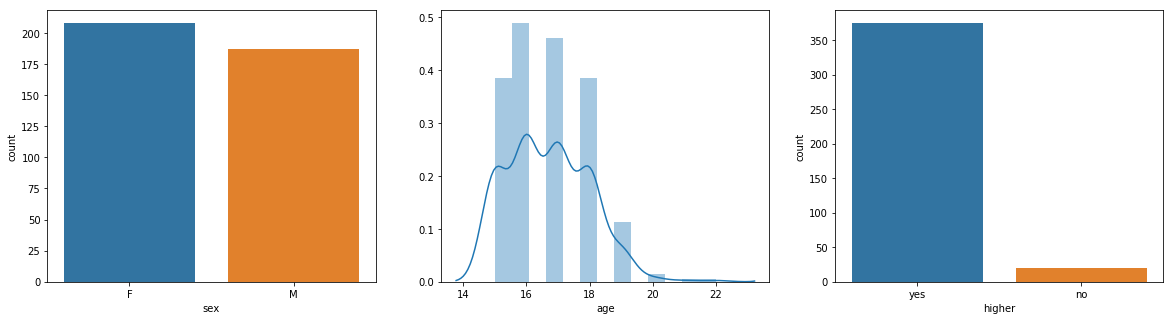

In [6]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=student_mat, x='sex')

plt.subplot(1, 3, 2)
sns.distplot(student_mat.age)

plt.subplot(1, 3, 3)
_ = sns.countplot(data=student_mat, x='higher')

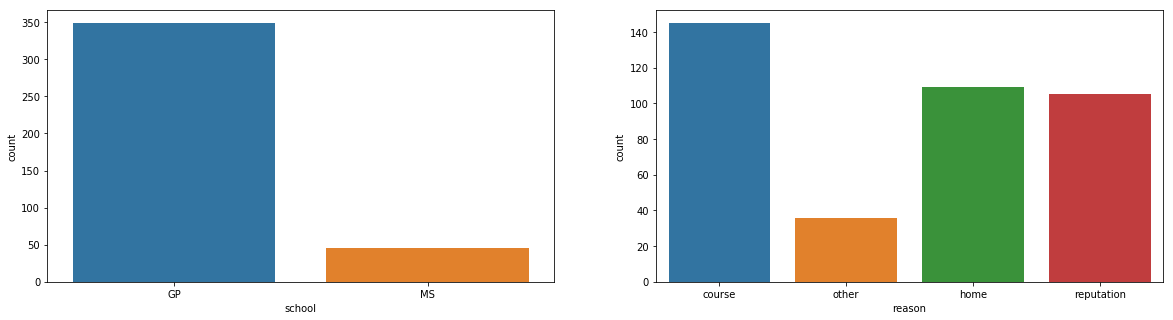

In [15]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.countplot(student_mat.school)

plt.subplot(1, 2, 2)
_ = sns.countplot(student_mat.reason)

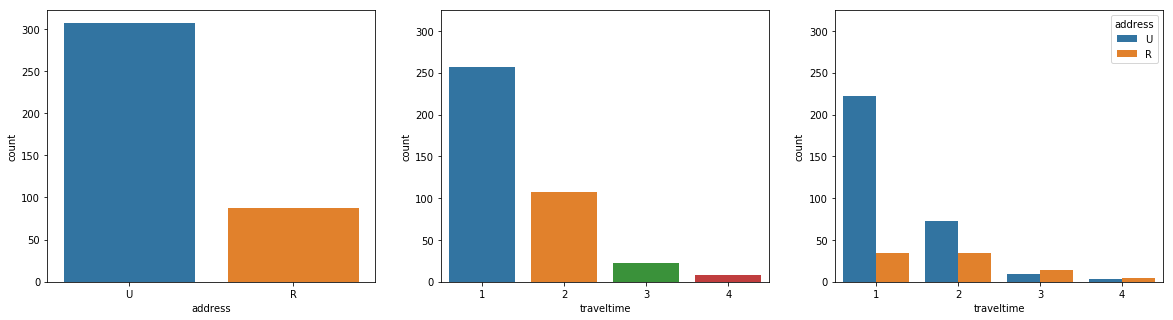

In [20]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.countplot(student_mat.address)

plt.subplot(1, 3, 2)
plt.ylim(0, 325)
sns.countplot(student_mat.traveltime)

plt.subplot(1, 3, 3)
plt.ylim(0, 325)
_ = sns.countplot(data=student_mat, x='traveltime', hue='address')

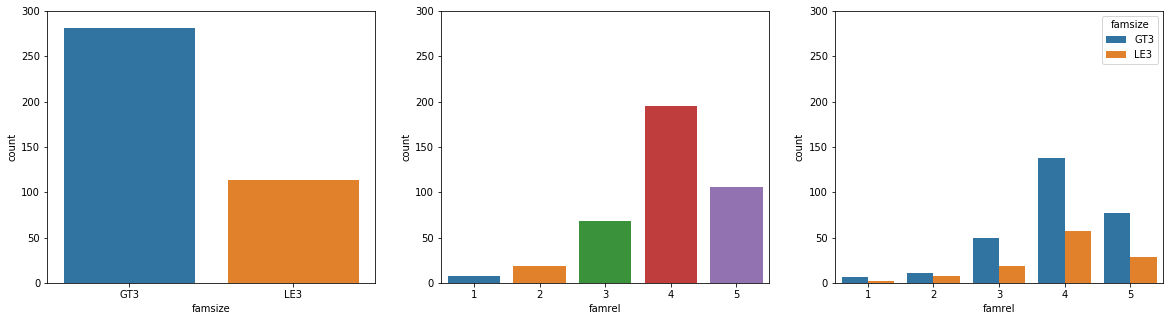

In [26]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.ylim(0, 300)
sns.countplot(student_mat.famsize)

plt.subplot(1, 3, 2)
plt.ylim(0, 300)
sns.countplot(student_mat.famrel)

plt.subplot(1, 3, 3)
plt.ylim(0, 300)
_ = sns.countplot(data=student_mat, x='famrel', hue='famsize')

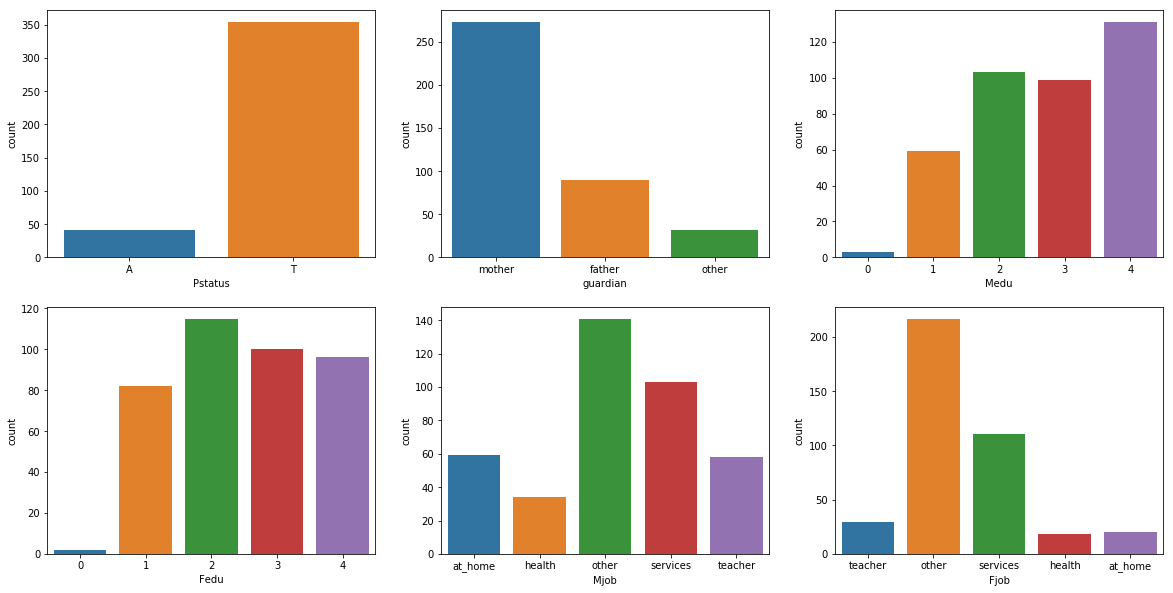

In [33]:
lines = 2
cols = 3

attributes = ['Pstatus', 'guardian', 'Medu', 'Fedu', 'Mjob', 'Fjob']

plt.figure(figsize=(20, 10))

i = 1
for att in attributes:
    plt.subplot(2, 3, i)
    sns.countplot(student_mat[att])
    i = i + 1